# Exercise: Statistical Analysis-3

In the previous exercise, you used a multiple regression model to assess the relationship between a response variable and several explanatory variables. Here, you will use a multiple logistic regression model to assess the relationship between a categorical response variable and several explanatory variables. 

When you finish this exercise, you will learn how to:
1. use multiple logistic model
2. use the tidymodels package for statistical modeling 

Load the **tidyverse** package.

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ──────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Load the **tidymodels** package.

In [2]:
# Load tidymodels
library(tidymodels)

── Attaching packages ─────────────────────────────────── tidymodels 0.1.2 ──

✔ broom     0.7.2      ✔ recipes   0.1.15
✔ dials     0.0.9      ✔ rsample   0.0.9 
✔ infer     0.5.3      ✔ tune      0.1.3 
✔ modeldata 0.1.0      ✔ workflows 0.2.1 
✔ parsnip   0.1.5      ✔ yardstick 0.0.7 

── Conflicts ────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



## COVID-19 case-fatality rate

You will continue using the COVID-19 data from [Our World in Data](https://ourworldindata.org/) to explore the demographic and socioeconomic factors that may influence COVID-19 case-fatality rate (CFR). But, this time, instead of a continuous outcome variable, CFR, you will create the categorical variable for high or low CFR. Check the [codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) for the description of the different variables in this dataset.

In [16]:
# Import the COVID-19 data
link <- "https://covid.ourworldindata.org/data/owid-covid-data.csv"
cfr <- read_csv(link,
        col_types = cols(
            iso_code = col_character(),
            continent = col_character(),
            location = col_character(),
            date = col_date(format = ""),
            icu_patients = col_double(),
            icu_patients_per_million = col_double(),
            hosp_patients = col_double(),
            hosp_patients_per_million = col_double(),
            weekly_icu_admissions = col_double(),
            weekly_icu_admissions_per_million = col_double(),
            weekly_hosp_admissions = col_double(),
            weekly_hosp_admissions_per_million = col_double(),
            tests_units = col_character(),
            total_vaccinations = col_double(),
            people_vaccinated = col_double(),
            people_fully_vaccinated = col_double(),
            new_vaccinations = col_double(),
            new_vaccinations_smoothed = col_double(),
            total_vaccinations_per_hundred = col_double(),
            people_vaccinated_per_hundred = col_double(),
            new_vaccinations_smoothed_per_million = col_double(),
            people_fully_vaccinated_per_hundred = col_double()
        )
    )

In [17]:
# Check data structure
glimpse(cfr)

Rows: 76,215
Columns: 59
$ iso_code                              <chr> "AFG", "AFG", "AFG", "AFG", "AFG…
$ continent                             <chr> "Asia", "Asia", "Asia", "Asia", …
$ location                              <chr> "Afghanistan", "Afghanistan", "A…
$ date                                  <date> 2020-02-24, 2020-02-25, 2020-02…
$ total_cases                           <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4,…
$ new_cases                             <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,…
$ new_cases_smoothed                    <dbl> NA, NA, NA, NA, NA, 0.143, 0.143…
$ total_deaths                          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ new_deaths                            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ new_deaths_smoothed                   <dbl> NA, NA, NA, NA, NA, 0, 0, 0, 0, …
$ total_cases_per_million               <dbl> 0.026, 0.026, 0.026, 0.026, 0.02…
$ new_cases_per_million                 <dbl> 0.026, 0.000, 0.000, 0.000, 0.00…
$ new_cases_smo

In [18]:
# Check the top and bottom rows
head(cfr)
tail(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2020-02-24,1,1,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-25,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-26,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-27,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-28,1,0,NA,NA,NA,NA,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511
AFG,Asia,Afghanistan,2020-02-29,1,0,0.143,NA,NA,0,⋯,1803.987,NA,597.029,9.59,NA,NA,37.746,0.5,64.83,0.511


iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZWE,Africa,Zimbabwe,2021-03-15,36504,20,30.714,1504,1,2.429,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-16,36535,31,30.571,1507,3,2.571,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-17,36552,17,30.143,1508,1,2.714,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-18,36611,59,33.429,1509,1,2.429,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-19,36652,41,32.714,1510,1,2.000,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
ZWE,Africa,Zimbabwe,2021-03-20,36662,10,27.286,1510,0,1.286,⋯,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Perform data cleaning to remove rows that are not needed during statistical analysis. Just like in the previous exercise, create a new variable: `cfr`, which is the total number of deaths due to COVID-19 divided by the total number of confirmed COVID-19 cases multiplied by 100.

In [20]:
cfr <- cfr %>%
    # Subset latest data
    filter(date == max(date)) %>% 
    # Remove rows containing NAs in continent column 
    drop_na(continent) %>%
    # Create the CFR variable
    mutate(cfr = (total_deaths/total_cases)*100)
head(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cfr
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2021-03-20,56093,24,19.143,2462,0,1.143,⋯,NA,597.029,9.59,NA,NA,37.746,0.50,64.83,0.511,4.3891395
ALB,Europe,Albania,2021-03-20,120541,519,531.429,2133,11,14.714,⋯,1.1,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795,1.7695224
DZA,Africa,Algeria,2021-03-20,116066,96,131.857,3055,2,3.000,⋯,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2.6321231
AND,Europe,Andorra,2021-03-20,11481,50,36.143,113,0,0.143,⋯,NA,109.135,7.97,29.0,37.8,NA,NA,83.73,0.868,0.9842348
AGO,Africa,Angola,2021-03-20,21696,54,53.286,526,2,0.857,⋯,NA,276.045,3.94,NA,NA,26.664,NA,61.15,0.581,2.4244100
ATG,North America,Antigua and Barbuda,2021-03-20,1033,22,10.143,28,1,0.143,⋯,NA,191.511,13.17,NA,NA,NA,3.80,77.02,0.778,2.7105518


In [21]:
# Summary statistics of cfr variable
summary(cfr$cfr)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 0.04985  1.09760  1.71765  2.07269  2.59326 22.48322       12 

In [24]:
# Drop rows containing NAs in the cfr column
cfr <- cfr %>%
    drop_na(cfr)

Visualize the distribution the `cfr` variable.

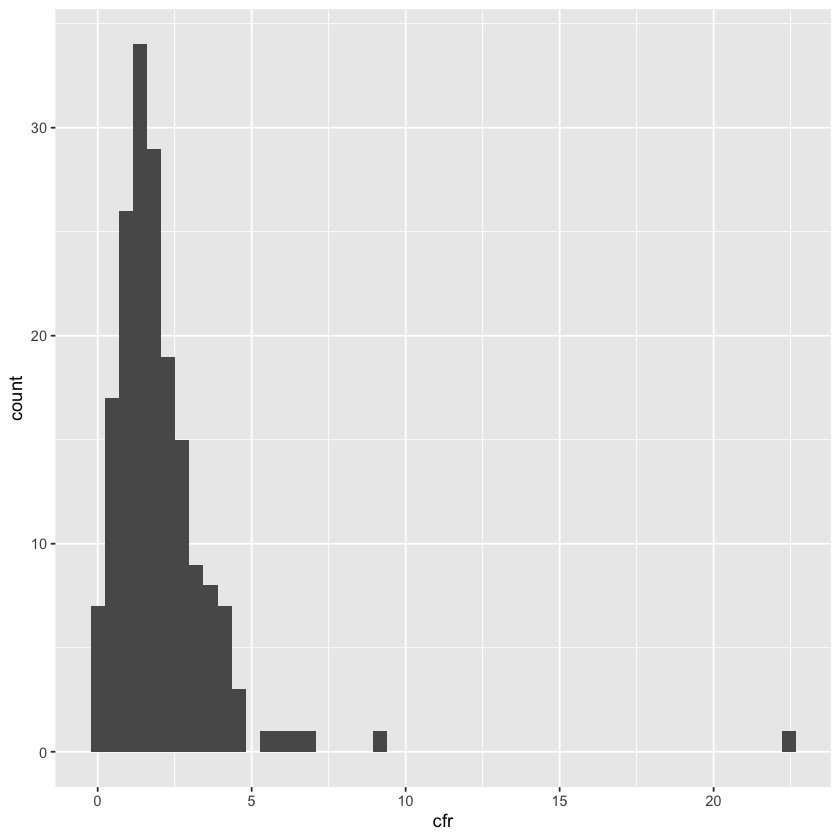

In [25]:
# Visualize using histogram
cfr %>% ggplot(aes(cfr)) +
    geom_histogram(bins = 50)

Create a new categorical outcome variable for CFR, where you will assign an integer value of "1" if the CFR value is greater than 3 or assign an integer of value of "0" if the CFR value is less than or equal to 3. Use a combination of **`mutate( )`** and **`if_else( )`** functions for coding this dummy variable. The cutoff value is selected arbitrarily and you may change it during model selection. 

In [30]:
# Create a new categorical outcome variable: cfr_cat
cfr <- cfr %>% mutate(
            cfr_cat = if_else(
                cfr > 3,
                1L,
                0L
            )
)

Check the first few rows if the coding of the new variable corresponds to the CFR values.

In [32]:
# Check the first few rows 
head(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cfr,cfr_cat
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AFG,Asia,Afghanistan,2021-03-20,56093,24,19.143,2462,0,1.143,⋯,597.029,9.59,NA,NA,37.746,0.50,64.83,0.511,4.3891395,1
ALB,Europe,Albania,2021-03-20,120541,519,531.429,2133,11,14.714,⋯,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795,1.7695224,0
DZA,Africa,Algeria,2021-03-20,116066,96,131.857,3055,2,3.000,⋯,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2.6321231,0
AND,Europe,Andorra,2021-03-20,11481,50,36.143,113,0,0.143,⋯,109.135,7.97,29.0,37.8,NA,NA,83.73,0.868,0.9842348,0
AGO,Africa,Angola,2021-03-20,21696,54,53.286,526,2,0.857,⋯,276.045,3.94,NA,NA,26.664,NA,61.15,0.581,2.4244100,0
ATG,North America,Antigua and Barbuda,2021-03-20,1033,22,10.143,28,1,0.143,⋯,191.511,13.17,NA,NA,NA,3.80,77.02,0.778,2.7105518,0


Note that the vector type of the outcome variable `cfr_cat` is an integer. Use the **`factor( )`** function to change it as a factor with the label `0` as the reference. 

In [35]:
cfr$cfr_cat <- factor(cfr$cfr_cat,
                      levels = c(0,1))

In [36]:
# Check the top rows to see if crf_cat is a factor
head(cfr)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,cfr,cfr_cat
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
AFG,Asia,Afghanistan,2021-03-20,56093,24,19.143,2462,0,1.143,⋯,597.029,9.59,NA,NA,37.746,0.50,64.83,0.511,4.3891395,1
ALB,Europe,Albania,2021-03-20,120541,519,531.429,2133,11,14.714,⋯,304.195,10.08,7.1,51.2,NA,2.89,78.57,0.795,1.7695224,0
DZA,Africa,Algeria,2021-03-20,116066,96,131.857,3055,2,3.000,⋯,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,2.6321231,0
AND,Europe,Andorra,2021-03-20,11481,50,36.143,113,0,0.143,⋯,109.135,7.97,29.0,37.8,NA,NA,83.73,0.868,0.9842348,0
AGO,Africa,Angola,2021-03-20,21696,54,53.286,526,2,0.857,⋯,276.045,3.94,NA,NA,26.664,NA,61.15,0.581,2.4244100,0
ATG,North America,Antigua and Barbuda,2021-03-20,1033,22,10.143,28,1,0.143,⋯,191.511,13.17,NA,NA,NA,3.80,77.02,0.778,2.7105518,0


In [37]:
# How many countries have labels "1" and "0" in the cfr_cat variable?
table(cfr$cfr_cat)


  0   1 
148  32 

## Logistic Regression

From the lecture, logistic regression is a type of generalized linear model (GLM), which is a family of linear models that is useful if the outcome variable is a count or categorical data. Other types of GLMs include Poisson regression, binomial and binary regression. A GLM has three components:
1. An exponential family model for the response variable.
2. A systematic component through linear predictor or explanatory variables.
3. A link function that connects the response or outcome variable to the linear predictor variables.

$$ {Y} = {\beta}_{0} + {\beta}_{1}{X}_{1} + {\beta}_{2}{X}_{2} + {\beta}_{3}{X}_{3} + ... + {\beta}_{n}{X}_{n} $$ 

In this model, the response variable `Y` is a binary indicator of whether the CFR is greater than 3 (code = 1) or CFR is less than or equal to 3 (code = 0). Use the following the explanatory variables in this model: GDP per capita, population, population density, cardiovascular disease (CVD) death rate, and diabetes prevalence.

In [45]:
# Subset the variables of interest
cfr_sub <- cfr %>%
    select(cfr_cat, male_smokers, female_smokers, gdp_per_capita, population, 
           population_density, cardiovasc_death_rate, diabetes_prevalence)
head(cfr_sub)

cfr_cat,male_smokers,female_smokers,gdp_per_capita,population,population_density,cardiovasc_death_rate,diabetes_prevalence
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,1803.987,38928341,54.422,597.029,9.59
0,51.2,7.1,11803.431,2877800,104.871,304.195,10.08
0,30.4,0.7,13913.839,43851043,17.348,278.364,6.73
0,37.8,29.0,NA,77265,163.755,109.135,7.97
0,NA,NA,5819.495,32866268,23.890,276.045,3.94
0,NA,NA,21490.943,97928,231.845,191.511,13.17


In [46]:
# Transform the predictor variables to log
cfr_sub <- cfr_sub %>% mutate_at(
    c("male_smokers", "female_smokers", "gdp_per_capita", "population", "population_density", "cardiovasc_death_rate", "diabetes_prevalence"), 
    log)
summary(cfr_sub)

 cfr_cat  male_smokers   female_smokers    gdp_per_capita     population   
 0:148   Min.   :2.041   Min.   :-2.3026   Min.   : 6.494   Min.   :10.43  
 1: 32   1st Qu.:3.060   1st Qu.: 0.6419   1st Qu.: 8.349   1st Qu.:14.87  
         Median :3.436   Median : 1.7664   Median : 9.417   Median :16.12  
         Mean   :3.378   Mean   : 1.6245   Mean   : 9.244   Mean   :15.93  
         3rd Qu.:3.712   3rd Qu.: 2.9575   3rd Qu.:10.196   3rd Qu.:17.27  
         Max.   :4.332   Max.   : 3.7842   Max.   :11.669   Max.   :21.09  
         NA's   :44      NA's   :42        NA's   :7                       
 population_density cardiovasc_death_rate diabetes_prevalence
 Min.   :0.6831     Min.   :4.374         Min.   :-0.01005   
 1st Qu.:3.5905     1st Qu.:5.126         1st Qu.: 1.64481   
 Median :4.4140     Median :5.494         Median : 1.96150   
 Mean   :4.3663     Mean   :5.444         Mean   : 1.90522   
 3rd Qu.:5.3354     3rd Qu.:5.779         3rd Qu.: 2.28747   
 Max.   :9.8703     

### Model instantiation

Using the **tidymodels** approach, the first step is to specify the type of model. Use the **`logistic_reg( )`** function to set up the logistic regression model. Set the `mode` argument to **`classification`** since the model will determine if the outcome is "1" or "0" based on the predictor variables. The **`set_engine( )`** is used to specify the algorithm in fitting the model, which in this case is `glm`.

In [49]:
log_model <- logistic_reg(mode = "classification") %>%
                set_engine("glm")

### Model formula

Create a formula vector describing the outcome variable and explanatory variables of the model. 

In [51]:
formula <- cfr_cat ~ male_smokers + female_smokers + gdp_per_capita + population + population_density + 
            cardiovasc_death_rate + diabetes_prevalence

### Model fitting

Use the **`fit( )`** function for run the model.

In [52]:
log_fit <- log_model %>%
            fit(formula, data = cfr_sub)
log_fit

parsnip model object

Fit time:  22ms 

Call:  stats::glm(formula = cfr_cat ~ male_smokers + female_smokers + 
    gdp_per_capita + population + population_density + cardiovasc_death_rate + 
    diabetes_prevalence, family = stats::binomial, data = data)

Coefficients:
          (Intercept)           male_smokers         female_smokers  
              3.14572                0.29141               -0.01525  
       gdp_per_capita             population     population_density  
             -0.61898                0.18726               -0.19658  
cardiovasc_death_rate    diabetes_prevalence  
             -0.39073               -0.02426  

Degrees of Freedom: 133 Total (i.e. Null);  126 Residual
  (46 observations deleted due to missingness)
Null Deviance:	    126 
Residual Deviance: 114.9 	AIC: 130.9

Access the results using the **`pluck( )`** and **`summary( )`** functions.

In [53]:
log_model_res <- log_fit %>% 
                    pluck("fit") %>% 
                    summary()
log_model_res


Call:
stats::glm(formula = cfr_cat ~ male_smokers + female_smokers + 
    gdp_per_capita + population + population_density + cardiovasc_death_rate + 
    diabetes_prevalence, family = stats::binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1654  -0.6860  -0.4770  -0.3337   2.2045  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)  
(Intercept)            3.14572    5.90470   0.533   0.5942  
male_smokers           0.29141    0.66685   0.437   0.6621  
female_smokers        -0.01525    0.21508  -0.071   0.9435  
gdp_per_capita        -0.61898    0.31942  -1.938   0.0526 .
population             0.18726    0.14590   1.283   0.1993  
population_density    -0.19658    0.20018  -0.982   0.3261  
cardiovasc_death_rate -0.39073    0.76922  -0.508   0.6115  
diabetes_prevalence   -0.02426    0.53132  -0.046   0.9636  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial fami

In [ ]:
# What is your interpretation based on this results?
# Answer:

## Model selection

Play around with the different variables in the COVID-19 case-fatality rate dataset to find the best-fit model using model selection method of your choice. Change the cut-off value of CFR and see if the model improves or not.

In [ ]:
# Write your code below for model selection
